<a href="https://colab.research.google.com/github/lemonwater600ml/6220-hw2/blob/master/6220_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load data from tfds
tfds.disable_progress_bar()
tf.enable_v2_behavior()

start = time.time()

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

print("Elapsed time for loading data: \n" +  str(round((time.time() - start)*1000)) + "ms")

# Convert to np.array
start = time.time()

train_array = np.vstack(tfds.as_numpy(ds_train))
X_train = np.array(list(map(lambda x: x[0], train_array)))
y_train = np.array(list(map(lambda x: x[1], train_array)))

test_array = np.vstack(tfds.as_numpy(ds_test))
X_test = np.array(list(map(lambda x: x[0], test_array)))
y_test = np.array(list(map(lambda x: x[1], test_array)))

print("Elapsed time for converting data into np.array: \n" +  str(round((time.time() - start)*1000)) + "ms")

Elapsed time for loading data: 
183ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Elapsed time for converting data into np.array: 
32080ms


In [3]:
# np.unique(y_train): 26
# np.unique(y_train): 19
# Select classes
classes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
can = [1, 2, 3]
not_can = [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


# Training data
# k = 3    => 3 classes, 1600 
# unkown > 4 ~ 19 => 16 classes. 100 each => unknow: 1600 images

# Filter classes for training data
counter = [0] * 26
filter_arr = []
for elm in y_train:
  if int(elm) in can and counter[elm - 1] < 1600:
    filter_arr.append(True)
    counter[elm - 1] += 1
  elif 4 <= int(elm) <= 19 and counter[elm - 1] < 100: 
    filter_arr.append(True)
    counter[elm - 1] += 1
  else:
    filter_arr.append(False)

y_train_k3 = y_train[filter_arr]
print(y_train_k3.shape)
# (6400,)
X_train_k3 = X_train[filter_arr]
# (6400, 28, 28, 1)
print(X_train_k3.shape)

# Test data
counter_test = [0] * 26
filter_arr_test = []
for elm in y_test:
  if int(elm) in can and counter_test[elm - 1] < 320:
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  elif 4 <= int(elm) <= 19 and counter_test[elm - 1] < 20: 
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  else:
    filter_arr_test.append(False)

y_test_k3 = y_test[filter_arr_test]
print(y_test_k3.shape)
# (1280,)
X_test_k3 = X_test[filter_arr_test]
# (1280, 28, 28, 1)
print(X_test_k3.shape)


(6400,)
(6400, 28, 28, 1)
(1280,)
(1280, 28, 28, 1)


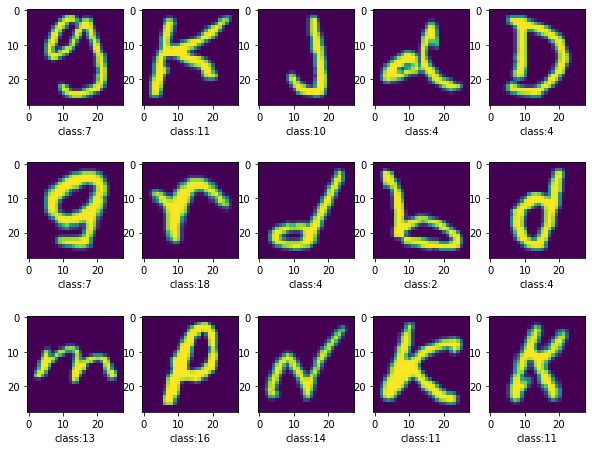

In [4]:

fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train_k3[i].T.reshape([28,28]))
    ax.set_xlabel("class:"+ str(y_train_k3[i]))
    # ax.set_xlabel("class:"+ str(y_train_k3[i]) + "(" + str(chr(y_train_k3[i]+64)) + ")")



In [5]:
# Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(37, activation='softmax')
])

# Model configuration
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)


In [6]:
# Train model
start = time.time()

history = model.fit(
    X_train_k3, y_train_k3,
    epochs=10,
    validation_data=(X_test_k3, y_test_k3),
)

elapsed_time = time.time() - start
print("Elapsed time for training training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")


Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 7.2536 - accuracy: 0.5839 - val_loss: 1.7417 - val_accuracy: 0.6938
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 1.2152 - accuracy: 0.7270 - val_loss: 1.3154 - val_accuracy: 0.7250
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7888 - accuracy: 0.7947 - val_loss: 1.0933 - val_accuracy: 0.7547
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.8292 - val_loss: 1.0269 - val_accuracy: 0.7836
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8642 - val_loss: 0.9609 - val_accuracy: 0.7914
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8736 - val_loss: 0.9495 - val_accuracy: 0.7914
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8834 - val_loss: 0.9565 - val_accuracy: 0.7859
Epoch 

In [7]:
# Evaluate training data
start = time.time()

model.evaluate(x = X_train_k3, y = y_train_k3, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

200/200 - 0s - loss: 0.2491 - accuracy: 0.9234
Elapsed time for evaluating training set: 
195 ms


In [8]:
# Evaluate test data
start = time.time()

model.evaluate(x = X_test_k3, y = y_test_k3, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating test set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

40/40 - 0s - loss: 1.0021 - accuracy: 0.8242
Elapsed time for evaluating test set: 
67 ms


Text(0, 0.5, 'Accuray')

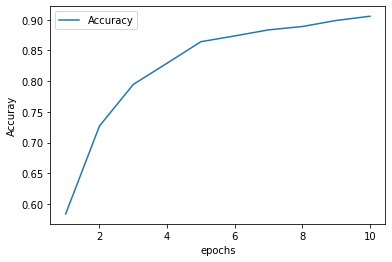

In [9]:
# Make accuracy plot
import matplotlib.pyplot as plt
import seaborn as sns
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [10]:
# k = 11
# Select classes
classes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
can = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11 ]
not_can = [12, 13, 14, 15, 16, 17, 18, 19]

# Training data
# k = 10 [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]    
# => 11 classes, 1600 each
# unkown > [12, 13, 14, 15, 16, 17, 18, 19] 
# => 8 classes. 200 each => unknow: 1600 images

# Filter classes for training data
counter = [0] * 26
filter_arr = []
for elm in y_train:
  if int(elm) in can and counter[elm - 1] < 1600:
    filter_arr.append(True)
    counter[elm - 1] += 1
  elif 12 <= int(elm) <= 19 and counter[elm - 1] < 200: 
    filter_arr.append(True)
    counter[elm - 1] += 1
  else:
    filter_arr.append(False)

y_train_k11 = y_train[filter_arr]
print(y_train_k11.shape)
# (19200,)
X_train_k11 = X_train[filter_arr]
# (19200, 28, 28, 1)
print(X_train_k11.shape)

# Test data
counter_test = [0] * 26
filter_arr_test = []
for elm in y_test:
  if int(elm) in can and counter_test[elm - 1] < 320:
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  elif 12 <= int(elm) <= 19 and counter_test[elm - 1] < 40: 
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
  else:
    filter_arr_test.append(False)

y_test_k11 = y_test[filter_arr_test]
print(y_test_k11.shape)
# (3840,)
X_test_k11 = X_test[filter_arr_test]
# (3840, 28, 28, 1)
print(X_test_k11.shape)





(19200,)
(19200, 28, 28, 1)
(3840,)
(3840, 28, 28, 1)


In [11]:
# k = 11
# Build model
model11 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(37, activation='softmax')
])

# Model configuration
model11.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)


In [12]:
# k = 11
# Train model
start = time.time()

history11 = model11.fit(
    X_train_k11, y_train_k11,
    epochs=10,
    validation_data=(X_test_k11, y_test_k11),
)

elapsed_time = time.time() - start
print("Elapsed time for training training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")


Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 3.7210 - accuracy: 0.4913 - val_loss: 1.4125 - val_accuracy: 0.6161
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 1.1283 - accuracy: 0.6910 - val_loss: 1.0279 - val_accuracy: 0.7253
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.8741 - accuracy: 0.7532 - val_loss: 0.8903 - val_accuracy: 0.7508
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.7100 - accuracy: 0.7972 - val_loss: 0.7531 - val_accuracy: 0.8021
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6177 - accuracy: 0.8193 - val_loss: 0.7302 - val_accuracy: 0.8062
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.8340 - val_loss: 0.7037 - val_accuracy: 0.8148
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.8507 - val_loss: 0.7331 - val_accuracy: 0.7992
Epoch 

In [13]:
# k = 11
# Evaluate training data
start = time.time()

model11.evaluate(x = X_train_k11, y = y_train_k11, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

600/600 - 1s - loss: 0.3116 - accuracy: 0.9024
Elapsed time for evaluating training set: 
538 ms


In [14]:
# k = 11
# Evaluate test data
start = time.time()

model11.evaluate(x = X_test_k11, y = y_test_k11, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating test set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

120/120 - 0s - loss: 0.5891 - accuracy: 0.8482
Elapsed time for evaluating test set: 
136 ms


Text(0, 0.5, 'Accuray')

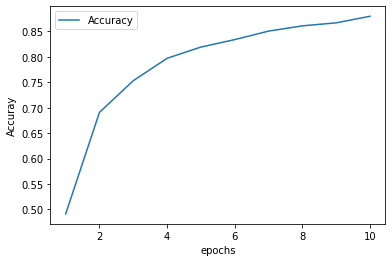

In [15]:
# k = 11
# Make accuracy plot
import matplotlib.pyplot as plt
import seaborn as sns
q = len(history11.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history11.history['accuracy'], label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')